# Delete

In [7]:
import numpy as np
import bisect
import matplotlib.pyplot as plt
import pimc # custom module
from scipy.stats import truncexpon
from scipy.integrate import quad, simps

### Simulation parameters

In [8]:
# Simulation parameters
N = 4
L = N   # half-filling
t = 0
U = 3
mu = -0.1
    
# PIMC parameters
beta = 1
eta = 1/np.sqrt(L*beta)      # worm end fugacity

### Create a worldline configuration (with a worm)

head_loc:  [2, 2]
tail_loc:  [2, 1]
worm_length: 0.2500000000000000


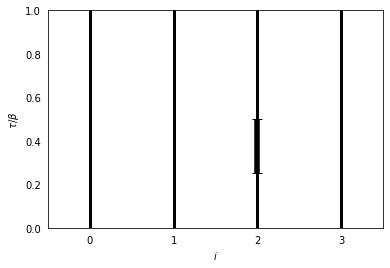

In [18]:
# Create a worldline configuration
alpha = []
for i in range(L):
    alpha.append(2)
data_struct = pimc.create_data_struct(alpha)
head_loc = []
tail_loc = []

# Insert a worm or antiworm
i = 2
n_i = alpha[i]
epsilon = np.finfo(float).eps

# worm 
tau_h = beta - epsilon
tau_h = beta/2
tau_t = 0 + epsilon
tau_t = beta/4

# antiworm
#tau_h = 0 + epsilon
#tau_h = beta/4
#tau_t = beta - epsilon
#tau_t = beta/2

if tau_t < tau_h:
    data_struct[i].append([tau_t,n_i+1,(i,i)])
    data_struct[i].append([tau_h,n_i,(i,i)])
    tail_loc = [i,1]
    head_loc = [i,2]
else: # antiworm
    data_struct[i].append([tau_h,n_i-1,(i,i)])
    data_struct[i].append([tau_t,n_i,(i,i)]) 
    head_loc = [i,1]
    tail_loc = [i,2]
    
print("head_loc: ",head_loc)
print("tail_loc: ",tail_loc)
print("worm_length: %.16f"%(tau_h-tau_t))

pimc.view_worldlines(data_struct,beta,figure_name=None)

R= 0.07407407407407407


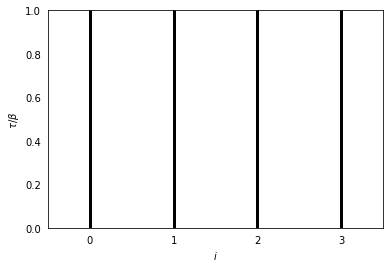

No worm or antiworm present.


In [19]:
pimc.worm_delete(data_struct, beta, head_loc, tail_loc, U, mu, eta)
pimc.view_worldlines(data_struct,beta,figure_name=None)
if head_loc == [] and tail_loc == []:
    print("No worm or antiworm present.")
else:
    print("Head time: %.16f"%data_struct[head_loc[0]][head_loc[1]][0])
    print("Tail time: %.16f"%data_struct[tail_loc[0]][tail_loc[1]][0])